In [1]:
""" Importing relevant libraries """
import matplotlib.pyplot as plt
import numpy as np
from numpy.random import uniform
from time import time
from copy import deepcopy

plt.style.use("seaborn")

$\textbf{Introduction}$

X-rays are electromagnetic waves, or photons, with a wavelength in the range 0.01-10 nm. They have a wide range of applications, probably the most important of which is imaging the insides of humans and other organisms, which is well suited because they generally have optimal attenuation for the matter in the human body. Therefore, if we know thes attenuations for various parts of the human body, we can send in X-rays that will form an image on a receiver on the opposite side of whatever is imaged. This is, however, not entirely without risk. X-rays can be harmful to humans by damaging genetic materials causing cancer and a range of other health problems (ACS, 2015). The maximum effective dose for the public is generally 1 mSv (Radiopaedia, 2017) (dose is measured in the unit Sieverts \[Sv = J/kg]). For this reason, it is useful to simulate X-ray imaging, finding the optimal energy and the resulting absorbed dosage, which will be the goal of this project.

$\textbf{Code implementation}$

The code is implemented with several code blocks for each problem for convenience regarding runtime. In problem 1, a general method for using Monte Carlo with N photons is implemented in the form of the Beam class. In problem 2, a function is implemented to solving sending this beam through material with 1 - 2 different attenuation coefficients at different locations. Furthermore, a class to import, store and handle data from bone.txt and tissue.txt is implemented. Most of the other code is related to a specific problem. Regarding units, they are all converted to standard SI with thr exception of energy, which is mostly handled as eV.

$\textbf{Problem 1}$

We will now preform a Monte Carlo simulation in 1D on first one, then N photons, and study the results in light of the theoretical solution from the problem text (NTNU, 2021). We expect to get relatively similar results in the simulation, with a slight deviation due to random error.

The constants in use are $t = 10$ cm and $\mu = 0.1$ cm$^{-1}$. The analytic solution is:

$I(x)=I_0e^{-\mu x}$

$N(x)=\frac{I(x)}{E}=N_0e^{-\mu x}$

In [2]:
""" Code for problem 1 """


class Props:
# This is a class that contains important global constants to be accessed throughout
# the project. It is designed to be morphed along the way.

    def __init__(self):
        self.t = 0.1           # m                 # Total distance for a given object, or for photons to travel.
        self.dx = self.t/1000  # m                 # Step length. This is used in the step() function in the class Beam.
        self.mu_1 = 10         # m^-1 (0.1 cm^-1)  # Attenuation coefficient for problem 1
        self.f_analytic = lambda N, x, mu: N*np.exp(-mu*x) # Analytic solution.
        self.__T = int(self.t/self.dx)             # Amount of spatial steps

        self.rho_tissue = 1.02 # g/cm^3  # Density of bone
        self.rho_bone = 1.92   # g/cm^3  # Density of tissue
    
    
    def set_tdx(self, dx = False, t = False):
    # Allowing for safe adjustments of t and dx:
        if dx: self.dx = dx
        if t : self.t  = t
        self.__T = int(self.t/self.dx)
    
    def getT(self): return self.__T
    # It would be safest to implement get-methods for t and dx as well; however, since function calling is slow in python and these                variables are frequently accessed, it is probably better to just be careful with their use.


class Beam:
# Used to handle Mone Carlo method. Represents N photons in a position __pos.

    def __init__(self, N):
        self.N = N
        self.__pos = 0
    
    def step(self, mu):
    # Single step for all photons using the Monte Carlo method
        p = mu*q.dx
        randNums = uniform(0, 1, self.N)          # Generating N random numbers
        self.N -= (self.N - np.sum(randNums > p)) # Changing N depending on amount of photons that did not get absorbed
        self.__pos += q.dx                        # Position increment

    def getPos(self): return self.__pos



def MCsingle(mu):
# Using the Monte Carlo method to simulate the attenuation of a single photon
    beam = Beam(1)    # Creating a beam instance with one photon
    for i in range(q.getT()):
        beam.step(mu)
        if beam.N == 0:
            break
    print(f"Single photon reached: {round(beam.getPos()*1e2, 3)} cm")



def MCmulti(mu, N):
# Monte carlo simulation for N photons. Returns an array with the amount of photons for each spacial step from 0 to t.
# Returns an array with spatial coordinates and an array with N-values for each coresponding point
    beam = Beam(N)    # Creating a beam with N photons.
    Ns = np.zeros(q.getT())
    for i in range(q.getT()):
        Ns[i] = beam.N
        beam.step(mu)

    return np.linspace(0, q.t, q.getT()), Ns



def plotMCmulti(data, color):
# Plotting the simulation in the previous function along with the analytic solutions
# This function is designed to take in the return value of MCMulti() as the first parameter
    N = int(data[1][0])
    x = data[0]*100
    plt.plot(x, q.f_analytic(N, x/100, q.mu_1), color + '--', label=f"N = {N} (analytic)")
    plt.plot(x, data[1], color, label=f"N = {N}")


Sending 10 photons into material with attenuation coefficient of 10:
Single photon reached: 3.03 cm
Single photon reached: 1.05 cm
Single photon reached: 10.0 cm
Single photon reached: 3.94 cm
Single photon reached: 9.24 cm
Single photon reached: 0.15 cm
Single photon reached: 1.67 cm
Single photon reached: 6.5 cm
Single photon reached: 8.57 cm
Single photon reached: 8.03 cm


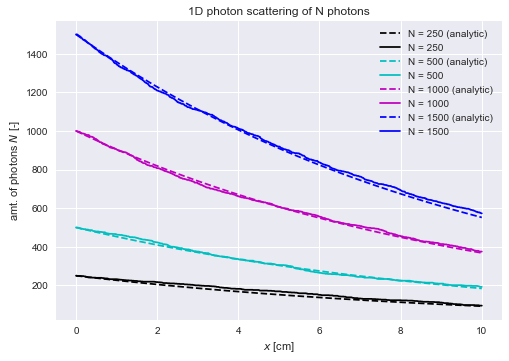

In [3]:
q = Props()        # Instantiating a Props class with relevant global variables

# Problem 1.1 - 1.2
print(f"Sending 10 photons into material with attenuation coefficient of {q.mu_1}:")
for i in range(10):
    MCsingle(q.mu_1)  

# Problem 1.4
Ns = [250, 500, 1000, 1500]    # Array of chosen N-values
colors = ['k', 'c', 'm', 'b']  # Array of color codes for the plot function
for i in range(len(Ns)):
    plotMCmulti(MCmulti(q.mu_1, Ns[i]), colors[i])
plt.title(f"1D photon scattering of N photons")
plt.xlabel("$x$ [cm]")
plt.ylabel("amt. of photons $N$ [-]")
plt.legend()

Sending in one photon at the time, it appears that most photons are scattered, but many of the photons almost got through for $\mu = 0.1$.

Regarding choice of step size $dx$, the method in use generally adapts to our choice (as per the definition of $\mu$), so it really only comes down to the desired accuracy (of course assuming that $dx \leq t$). If we choose a very small step size, the simulation will be significantly more realistic, because there will be much more drawn sample and less room for random error (law of big numbers). An additional requirement is that $dx \leq \frac{1}{\mu}$, otherwise there would be a probability greater than 1. In this problem, the step size was set to 0.01 cm, which means that there are 1000 total steps per beam of photons.

When multiple photons are simulated simultaneously, it can be seen from the figure that there is a clear correlation between the Monte Carlo simulation and the analytic solution, with slight deviation due to random error.  This meets the expectations and stands as a demonstration of the usefulness of these methods for further use in this project. When a larger step size was used, the deviation from the analytical curve was greater, as expected from the discussion in the first paragraph.

$\textbf{Problem 2}$

There are now two beams, one of which only goes through tissue (beam 1), and the other passes through tissue as well as a segment of bone (beam 2). Referring to figure 4 of the problem text (NTNU, 2021). In this problem we will adapt the program to allow for attenuation in different materials and study the differences between the two beams in order to achieve understanding of how X-ray imaging works.

In [4]:
""" Code for problem 2 """

class Data:
# Handling and storing of data from .txt files is done here

    def __init__(self, filenames):
    # Upon initialization, this class reads the files listed in "filenames"
        dats = []

        for filename in filenames:
            dats.append(self.__readData(filename))
        self.energies = [dats[0][0], dats[1][0]]
        # The coefficients are converted into the right format:
        self.mus = [dats[0][1]*q.rho_tissue*100, dats[1][1]*q.rho_bone*100]
        self.n = len(self.energies[0])


    def __readData(self, filename):
    # Private method that reads the data from the given files
        with open(filename, 'r') as f:       # Closes the file when it is out of scope
            while get := f.readline():       # := assigns and returns the rhs (rhs is False when readline() has reached the end of file)
                splt = get.split(',')
                if not ('cols' in locals()): # Checking if the 'cols' list exists. If not, we want to give it the correct dimensions.
                    ncols = len(splt)
                    cols = [[] for i in range(ncols)]
                for i in range(ncols):
                    cols[i].append(float(splt[i])) # Appending to each array in 'cols
        return np.array(cols)


    def printData(self):
    # Printing the data contained in the class. Mainly for testing purposes.
        print(f"Eneriges: \n{self.energies}")
        for i, mu in enumerate(self.mus):
            print(f"Mu{i+1}: \n{mu}")

    
    def copyInds(self, lowInd, highInd):
    # Allows us to create a new object sliced lists from the parent class, as will be needed in problem 2.
        newObj = deepcopy(self)
        for i in range(2): # Slicing energies
            newObj.energies[i] = self.energies[i][lowInd:highInd]
        for i in range(2): # Slicing mus
            newObj.mus[i] = self.mus[i][lowInd:highInd]
        newObj.n = len(newObj.energies[0])
        return newObj


q.set_tdx(t = 0.03) # m (3 cm)  # Updating t for use in problem 2


def plotAttenuationCoeffs(data, strings, fig = 1):
# Plots the attenuation coefficients contained in the given data class. Also takes in strings for labeling.
    plt.figure(fig)
    for i, dat in enumerate(data.mus):
        plt.loglog(data.energies[i], dat, label = strings[i])
    plt.xlabel("Energy [MeV]")
    plt.ylabel("$\mu$ [m$^{-1}$]")
    plt.title("[1] Attenuation coefficients")
    plt.legend()


def simulateBeam(mu1, mu2, mu2_range = (0, 0), N = 1000):
# Sends a beam of photons through a material with attenuation coefficient mu2 in the distance
# spanned by mu2_range, and mu1 otherwise. Returns the amount of photons that were not absorbed.

    beam = Beam(N)
    while beam.getPos() < q.t: # Only runs until it reached the end of the object.
        if mu2_range[0] < beam.getPos() < mu2_range[1]: # Checking which mu to use
            mu = mu2
        else: mu = mu1
        beam.step(mu)
    return beam.N


def simulateEnergies(energies, mu1, mu2, mu2_range = (0, 0), N = 10000):
# Runs simulateBeam() to calculate the intensity of the beams that hit the detector.
# Returns said intensities.
    Intensities = np.zeros(len(energies))
    for i in range(len(energies)):
        Intensities[i] = energies[i]*simulateBeam(mu1[i], mu2[i], mu2_range, N)
    return Intensities


def plotIntensitiesAndContrast(data):
# Finds and plots the intensities and contrasts from cropped (or sliced) data.

    E = data.energies[0]    # For the range we are interested in, all energies are the same.
    mu_tissue = data.mus[0]
    mu_bone = data.mus[1]


    # Finding the intensities
    # Beam 1:
    I_1 = simulateEnergies(E, mu_tissue, mu_bone)
    # Beam 2:
    I_2 = simulateEnergies(E, mu_tissue, mu_bone, mu2_range = (0.01, 0.02))


    # Plotting:
    fig, ax = plt.subplots(1, 2)
    ax[0].plot(E*1e3, I_1, label = "Beam 1: Only tissue")
    ax[0].plot(E*1e3, I_2, label = "Beam 2: Tissue and bone")
    ax[0].set_ylabel("Intensity [MeV]")
    ax[0].set_title("[2] Intensity for the two beams")


    # Contrasts given by equation (5) in the problem text
    Contrasts = (I_1 - I_2)/I_1     # Calculating the contrasts
    ax[1].plot(E*1e3, Contrasts, label = "Contrasts")
    ax[1].set_ylabel("Contrast [-]")
    ax[1].set_title("[3] Contrast between the two beams")

    for el in ax: # Labeling axes:
        el.set_xlabel("Photon energy [keV]")
        el.legend()
    
    plt.tight_layout(pad = 3)       # Getting tight layout
    
    return Contrasts


def findN_interval(mu1, mu2, mu2_range, I_min, E):
# Finds the starting interval for values of N. I am assuming that we cannot use the analytic solution to find N_upper. Calculating N_upper is tricky, and we can never be 100% sure that it will be higher than the analytic N_upper due to the randomness of our method.
    N_factor = 0
    N_upper = 10000                            # Starting estimate of N_upper
    while abs(N_factor) < 1e-20 and N_upper <= 50000:
        N_factor = simulateBeam(mu1, mu2, mu2_range, N_upper)/N_upper # Factor representing % of values that make it through the material
        N_upper += 5000
    N_lower = int(I_min/E)                     # If there was no attenuation, this would be the correct N. We never get more photons, so                                                     this acts as a lower limit.
    if N_factor >= 2/N_upper:                   # Making sure that N_factor is not unreasonably small ((almost) no photons make it)
        N_upper = 4*int(I_min/(N_factor*E))    # The upper estimate, twice the size indicated by N_factor for the sake of safety.
    else: N_upper = 0
    return [N_lower, N_upper]                  # Returns the linterval of Ns to search in


def findN(data, index, tol, mu2_range = (0, 0)):
# Using a binary search algorithm to find values for N that fall within the given tolerance of I_min.
# Returns the needed N-value, as well as the amount of photons that did not get absorbed. Returns pair of False if no N was found.
    I_min = 10 # MeV    # Minimum required value for I
    E = data.energies[0][index]
    mu1 = data.mus[0][index]
    mu2 = data.mus[1][index]

    # Finding N_ interval
    N = findN_interval(mu1, mu2, mu2_range, I_min, E)
    if not N[1]: return False, False # If N_upper = 0, (almost) no photons get through, and no N is sufficiently large to yield I > I_min.

    # Initial interval:
    maxIters = 600    # Count of iterations
    break_counter = 0  # Count of the amount of iterations the error has been larger than 80% of I_min (in which case we break)
    found = False
    for i in range(maxIters):
        N_mid = int((N[0] + N[1])/2) # Midpoint of 
        N_out = simulateBeam(mu1, mu2, mu2_range, N_mid)
        error = I_min - E*N_out
        
        if error < 0:   # This means that N is too large. Removing the lower end of the interval.
            N[1] = N_mid
        elif error > 0: # This means that N is too small. Removing the upper end of the interval.
            N[0] = N_mid
        if abs(error - I_min) < I_min/5: break_counter += 1 # Determening when to increment break_counter (see definition)
        if abs(error) < tol: # We found our N
            found = True
            break
        elif break_counter >= 150 or i == maxIters-1: # We did not find our N
            break

    return ((N_mid, N_out) if found else (False, False))


def findNs(data, tol, mu2_range = (0, 0)):
# Finds the given N values for all the data in the data class (1st parameter).
# Returns energies, required Ns (Ns) and Ns that were not absorbed in the last simulation (Ns_out).
    Ns, Ns_out = [np.zeros(data.n) for i in range(2)]
    time_start = time()     # Timer to keep track of runtime.
    for i in range(data.n):
        Ns[i], Ns_out[i] = findN(data, i, tol, mu2_range)
        print(f"Progress: Calculated {i+1}/{data.n} N-values, time ellapsed: {round(time() - time_start)} s")
    return data.energies[0], Ns, Ns_out


def floatZero(arr, E):
# Locates the last float (or zero) and inputs values to make a sudden "jump" in the graph.
# This is done for both the N-values (arr) and energies.
    for i in range(len(arr)):
        if arr[i]:
            E = np.insert(E, i, E[i])
            arr = np.insert(arr, i, 0)
            break
    return arr, E


def plotNs(energies, Ns, beamInd):
# Plots the required N-values in one plot. beamInd is the beam index (1 or 2).
    Ns, energies = floatZero(Ns, energies)

    plt.plot(energies*1e3, Ns, label = f"N values for I$_{beamInd}$")
    plt.title("[4] Required N-values for I $\geq$ 10 MeV")
    plt.xlabel("Energy [keV]")
    plt.ylabel("N [-]")
    plt.yscale('log')
    plt.legend()


def absorbedDose(energies, Ns_out, mu2_range = (0, 0)):
# Calculates the absorbed dose for a given N_out (eqn (6) in the problem text)
    mu2_int = mu2_range[1] - mu2_range[0]
    if abs(mu2_int) > 1e-8: # Checking i45f the mu interval is not zero, accounting for floating point errors.
        rho_eff = q.rho_bone*(mu2_int/q.t) + q.rho_tissue*(1 - mu2_int/q.t) # Effective density coefficient for beam
    else: rho_eff = q.rho_tissue
    D = Ns_out*(E*1.60218e-13)/rho_eff
    return D


def plotAbsorbedDose(energies, D1, D2):
# Takes in data of absorbed doses from both beam 1 and beam 2 and plots them
    p1, p2 = list(map(floatZero, [D1, D2], [energies, energies]))
    # p1: Pair of D-values and energies for beam 1 (and coresponding for beam 2)
    D = p1[0] + p2[0]  # Total absorbed dose
    plt.plot(p1[1]*1e3, D, 'k', label = "Total absorbed dose")
    plt.plot(p1[1]*1e3, p1[0], '--c', label = "Dose from I$_1$")
    plt.plot(p2[1]*1e3, p2[0], '--g', label = "Dose from I$_2$")
    plt.xlabel("Energy [keV]")
    plt.ylabel("Dose [Sv]")
    plt.title("[5] Absorbed dose from input intensity of photons")
    plt.yscale('log')
    plt.legend()

Progress: Calculated 1/8 N-values, time ellapsed: 0 s
Progress: Calculated 2/8 N-values, time ellapsed: 1 s
Progress: Calculated 3/8 N-values, time ellapsed: 1 s
Progress: Calculated 4/8 N-values, time ellapsed: 1 s
Progress: Calculated 5/8 N-values, time ellapsed: 1 s
Progress: Calculated 6/8 N-values, time ellapsed: 1 s
Progress: Calculated 7/8 N-values, time ellapsed: 1 s
Progress: Calculated 8/8 N-values, time ellapsed: 1 s
Progress: Calculated 1/8 N-values, time ellapsed: 0 s
Progress: Calculated 2/8 N-values, time ellapsed: 63 s
Progress: Calculated 3/8 N-values, time ellapsed: 63 s
Progress: Calculated 4/8 N-values, time ellapsed: 63 s
Progress: Calculated 5/8 N-values, time ellapsed: 63 s
Progress: Calculated 6/8 N-values, time ellapsed: 63 s
Progress: Calculated 7/8 N-values, time ellapsed: 63 s
Progress: Calculated 8/8 N-values, time ellapsed: 63 s


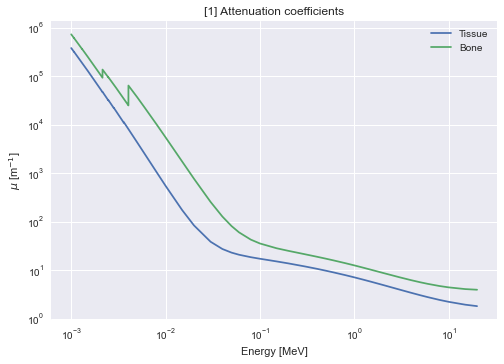

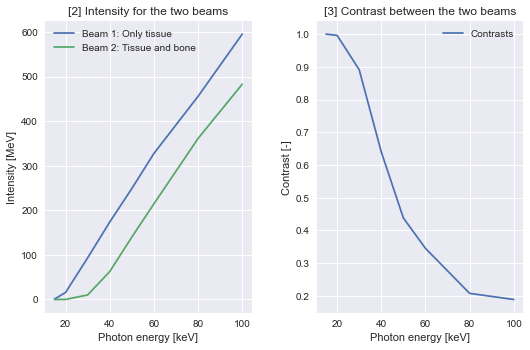

In [5]:
# Problem 2.1 - 2.4
data = Data(("tissue.txt", "bone.txt"))
croppedData = data.copyInds(22, 30) # 22 and 30 are the lower and upper bounds for the energies 10 keV - 100 keV
plotAttenuationCoeffs(data, ("Tissue", "Bone"))
Contrasts = plotIntensitiesAndContrast(croppedData)

# Problem 2.5 - 2.6 (this takes a long time, so the remainder of these problems are in the next block)
E, Ns_1, Ns_out1 = findNs(croppedData, 0.1)
E, Ns_2, Ns_out2 = findNs(croppedData,  0.1, (0.01, 0.02))

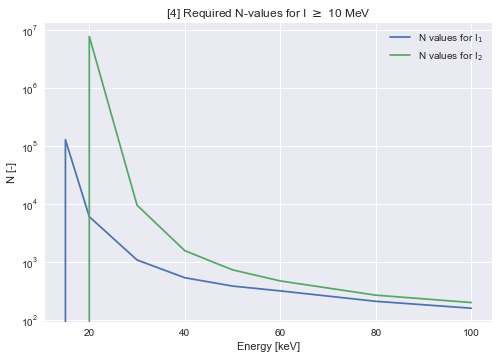

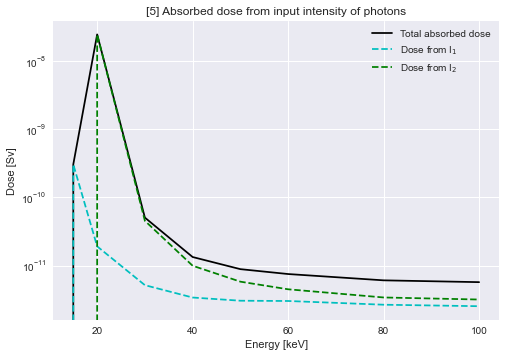

In [6]:
plotNs(E, Ns_1, 1)
plotNs(E, Ns_2, 2)
plt.figure(2)
D1 = absorbedDose(E, Ns_1)
D2 = absorbedDose(E, Ns_2)
plotAbsorbedDose(E, D1, D2)

Note that the sudden jumps in the curves when going from zero to a nonzero value have been added because one cannot be sure of any values before these points.

From the plots \[2] and \[3] portraying the intensity and contrast, the results are as expected. Since bone has a higher attenuation in general than tissue, the intensity for beam 1 will always be slightly higher than that of beam 2. The gap between the two paths would become even larger if we expanded the amount of bone that beam 2 would travel through or replaced the bone with material of even higher attenuation. The contrast is proportional to this gap (the difference), and since the gap size remains more or less constant throughout the energy range, the decrease in contrast for higher energies is caused by the inverse proportionality to $I_1$. Therefore, we can conclude that lower energies generally yield better contrasts.


As for the calculated N-values seen in plot \[4], this also yielded expected results. The graph clearly portrays an inversely proportional relationship between N and E, such that the N-value approaches infinity as E becomes small. For this reason, it was not possible to calculate the N-value for the lowest energy of beam 2 (10 keV). Further optimization was done by implementing a binary search-like algorithm, with a quite safe method for determining an initial interval (see code comments). An error of 0.1 MeV was allowed, which is exactly 1% of the target value.

When it comes to choosing an energy based on contrast and absorbed dosage, a simple optimization should do the trick. Assuming $f(E)$ and $g(E)$ are the normalized functions of contrast and total dosage respectively. We wish to find the maximum of the function $h(E) = \frac{f(E)}{g(E)}$ on the interval $E \in [10, 100] keV$ For our numerical values, this can be done easily using Numpy's argmax function. Alternatively, this could be done using $h(E) = f(E) - g(E)$, but it turns out that it would yield the same answer in this case.


In [7]:
def Simpson(f_vals, h):
# Uses simpsons method to integrate f_vals. If len(f_vals) is odd, there will be some error.
# The function was originally written for Project 1.
    # List operation to add 4 times every odd element and 2 times every even element (except at the extremums):
    integral = f_vals[0] + 4*sum(f_vals[1::2]) + 2*sum(f_vals[2::2])
    if not len(f_vals) % 2:
        # If f_vals has an even number of elements, we must subtract 3*f_end.
        integral -= 3*f_vals[-1]
    
    return integral * (h/3)


def optimizeDC(D1, D2, C, energies):
# Finds the ideal energy to Minimize dosage and maximize contrast and returns it in the unit keV.
    dx = 1e-4
    N0 = len(C)
    # We need to remove all zeros so that we don't wrongfully pick an enegy with one or both dosages missing due to failure to calculate N:
    D = np.array([])
    for i in range(len(D1)):
        if D1[i]*D2[i]:
            D = np.append(D, D1[i] + D2[i])
    C = C[(N0 - len(D)):] # Slicing the contrast to match D
    energies = energies[(N0 - len(D)):]
    D = D/Simpson(D, dx)  # Normalizing D
    C = C/Simpson(C, dx)  # Normalizing C
    h = C/D
    ind = np.argmax(h)    # The index that yields the maximum of h
    return energies[ind]*1e3

print(f"The ideal energy for maximum contrast and minimum absorbed dosage is E = {round(optimizeDC(D1, D2, Contrasts, E))} keV.")

The ideal energy for maximum contrast and minimum absorbed dosage is E = 50 keV.


This is only a very general indication of the optimal energy because the resolution of the contrast and absorbed dosage in this case is very low. The use of Simpson's method should to some degree compensate for the low resolution. For a more precise estimation one would need much more data on the relation between energy and attenuation coefficient for bone and tissue, and the calculation would be significantly more demanding in terms of processing-power.

$\textbf{Problem 3}$

Since the real world has three dimensions, we are interested in simulating X-ray attenuation for 3D objects. This can be done using "3D matrices" of attenuation coefficients where each slot represents a spatial coordinate. In the following problem we are given six such three-dimensional matrices. The simulation will be done for each of the three axes: x, y and z, and for each coordinate in the plane perpendicular to the relevant axis. We will send in 10000 photons for each coordinate and study their attenuation.

In [17]:
""" Code for problem 3 """

def MC3D(filename, ax, dx, dxpm, N = 1000):
# Preforming Monte Carlo for every space in a grid given by the variable ax
# ax: 0: x-axis, 1: y-axis, 2: z-axis
# dxpm: amount of x-steps per layer
# Returns a matrix of the amount of photons that were not absorbed
    assert(ax in (0, 1, 2))

    mus = np.load(filename)      # Loading 3D matrix of attenuation coefficients
    axes = np.shape(mus)         # Getting dimensions of matrix
    axes = axes[ax:] + axes[:ax] # Displacing the axis coordinates based on the axis input
    # axes[0] is now the axis along which our beam will travel
    
    q.set_tdx(t = dx*dxpm*axes[0], dx = dx)
    Ns_out = np.zeros((axes[1], axes[2]))

    for i in range(axes[2]):
        for j in range(axes[1]):
            beam = Beam(N)
            for k in range(axes[0]):
                # Need to handle the case for each axis:
                if   ax == 0: mu = mus[k//dxpm][j][i]
                elif ax == 1: mu = mus[i][k//dxpm][j]
                elif ax == 2: mu = mus[j][i][k//dxpm]
                beam.step(mu)
            Ns_out[j][i] = beam.N
    return Ns_out


n = 6
def calculateImages(dx, dxpm, N):
# Executes MC3D for each matrix along every axis and returns the result as a list of matrices (Ns_out)
    filenames = ["object1_20keV.npy", "object1_50keV.npy", "object1_100keV.npy",
                "object2_25keV.npy", "object2_50keV.npy", "object2_75keV.npy"]

    time_start = time()
    Ns_out = []
    for i in range(n):
        for ax in range(3):
            Ns_out.append(MC3D(filenames[i], ax, dx, dxpm, N))
            print(f"Progress: Calculated {ax+1 + i*3}/{n*3} images, time elapsed: {round(time() - time_start)} s")
    print(f"Done! Time ellapsed: {round(time() - time_start)} s")
    return Ns_out


def plotImage(Ims, titles, suptitle, N = 10000):
# Plots the resulting images and labeling axes
    fig, ax = plt.subplots(3, 3, figsize = (15, 12))
    ax = ax.transpose()
    for i in range(len(ax)):
        for j in range(len(ax[0])):
            cax = ax[i][j]
            Im = Ims[i*3+j]
            Im[-1][-1] = int(80*(N/100))                  # Setting a reference pixel in the lower right corner to get the same color scale.
            c = cax.imshow(Im/(N/100), cmap = plt.cm.jet) # The jet colormap was used as it gave an appropriate amount
                                                          # of color variation
            cax.grid()
            cax.get_xaxis().set_visible(False)
            cax.set_yticks([]) # No ticks on the y-axis, but the labeling must be visible
            if j == 0:
                cax.set_title(titles[i])           # Specifying energy.
            if i == 0:
                cax.set_ylabel(('x', 'y', 'z')[j]) # Specifying axis
    fig.colorbar(c, ax=ax.ravel().tolist(), label = "Amount of non-diffracted photons [%]")
    fig.suptitle(suptitle, y = 0.93,fontsize = 16)

                
# This is going to take a while, so the call is placed at the end of this block:
# Problem 3.1
Ns_outs = calculateImages(0.01, 3, 10000)

Progress: Calculated 1/18 images, time elapsed: 23 s
Progress: Calculated 2/18 images, time elapsed: 45 s
Progress: Calculated 3/18 images, time elapsed: 66 s
Progress: Calculated 4/18 images, time elapsed: 89 s
Progress: Calculated 5/18 images, time elapsed: 111 s
Progress: Calculated 6/18 images, time elapsed: 133 s
Progress: Calculated 7/18 images, time elapsed: 155 s
Progress: Calculated 8/18 images, time elapsed: 178 s
Progress: Calculated 9/18 images, time elapsed: 200 s
Progress: Calculated 10/18 images, time elapsed: 218 s
Progress: Calculated 11/18 images, time elapsed: 237 s
Progress: Calculated 12/18 images, time elapsed: 256 s
Progress: Calculated 13/18 images, time elapsed: 275 s
Progress: Calculated 14/18 images, time elapsed: 294 s
Progress: Calculated 15/18 images, time elapsed: 313 s
Progress: Calculated 16/18 images, time elapsed: 331 s
Progress: Calculated 17/18 images, time elapsed: 350 s
Progress: Calculated 18/18 images, time elapsed: 369 s
Done! Time ellapsed: 36

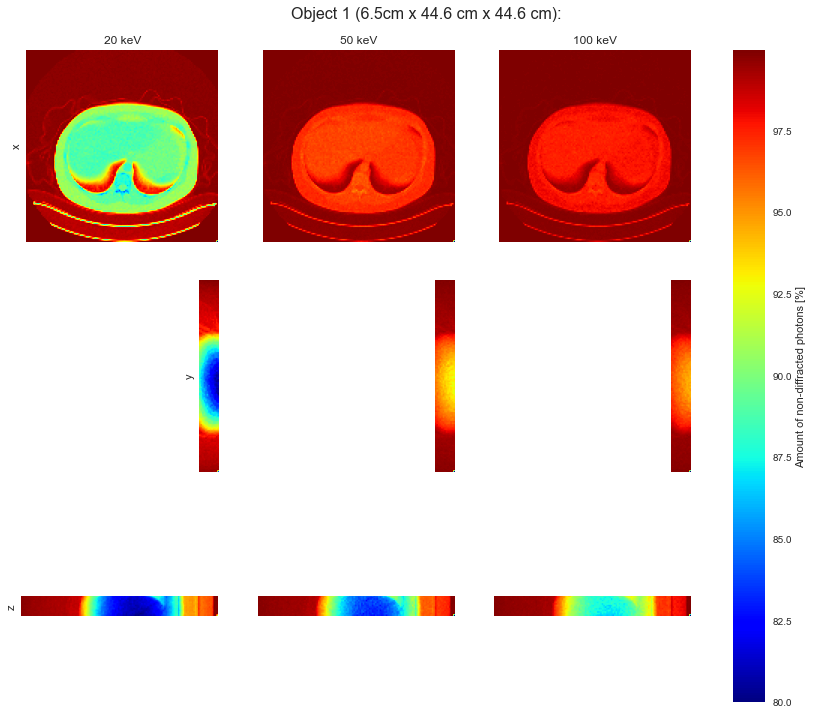

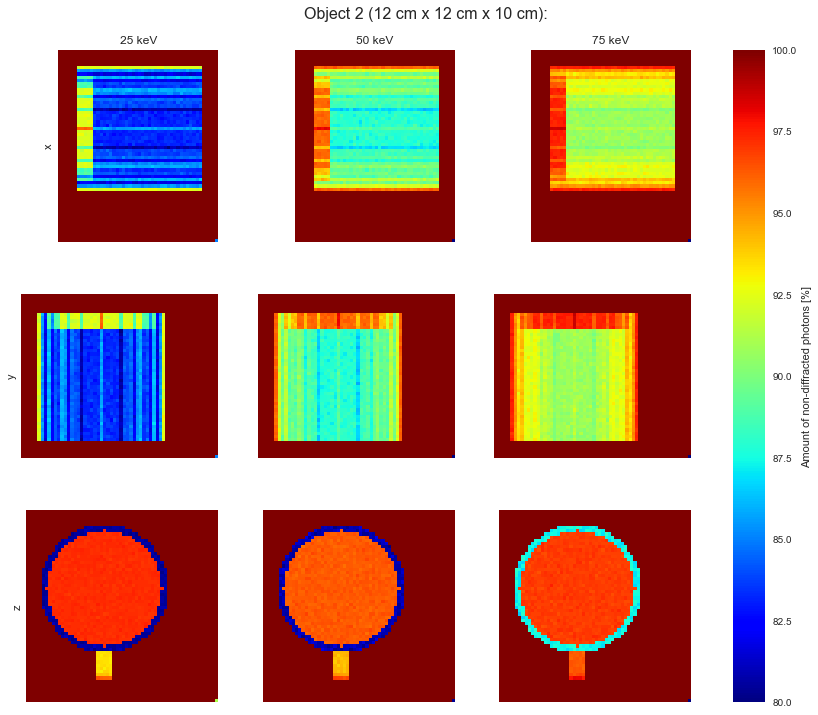

In [18]:
# Plotting results:
titles    = ["20 keV", "50 keV", "100 keV",
             "25 keV", "50 keV", "75 keV" ]

plotImage(Ns_outs[:9], titles[:3], "Object 1 (6.5cm x 44.6 cm x 44.6 cm):")
plotImage(Ns_outs[9:], titles[3:], "Object 2 (12 cm x 12 cm x 10 cm):")

The high-energy plots have a much higher attenuation than the low energy ones. Using somewhat low-energy X-rays would probably be best in our case, as it allows a suitable number of photons to pass through the objects. This does not only protect from harm by reducing the intensity compared to higher-energy photons, but also presents the object with higher contrast and greater detail. I believe that it would be best to pick photons of lower energy provided they don't cause a very large absorbed dosage, as they seem to yield a little better contrast. However, in this task we have not taken into account the requirements of output energies to be at least 10 MeV, meaning that the lower energy photons aren't necessarily detectable without sending in a lot of photons.

The first object is transparent in its extremities and quite dense in the center. Judging from its dimensions and the "cell-like" appearance of the core, it is possible that the object is a large egg.

The second object is clearly cylindrical and hollow with a protuder at the side, it is about the size of a fist. This fits all the descriptions of a mug. One could also assume that the mug is filled with some liquid, since we can see a clear difference in the upper and lower ends of the mug along the x- and y- axes. 

An attempt was made to make these plots more aesthetic, but it was difficult to do without reducing the informativeness.

$\textbf{Error analysis}$

There is a multitude of potential errors in this project. They can be categorized into numerical errors and physical errors (due to choice of model, simplifications, etc.):

- Much larger N-values would ideally be used for the simulations, but the possibilities are limited due to the slow runtime in Python. Numba could be used for faster compilation, but it turns out that it does not support custom classes.
- Any numerical solution is affected by error from floating point precision. However, modern methods are extremely precise compared to the accuracy requirements in the calculations in this project, so it should be safe to neglect this error.
- Real life is complicated, so using a model as simple as the one in this project is sure to cause some error.
- The Monte Carlo method can bring some random error if one is unlucky, but it should be safe to neglect this for reasonable values of N.

$\textbf{Conclusion}$

Monte Carlo methods have proven very useful to simulate photon attenuation and X-ray imaging. They gave potentially valuable results including required power (or number of photons) for the images, contrast of the image and absorbed dosage. It also shows what results one can expect when imaging with X-rays. But these results should still be taken with a grain of salt, as the accuracy is limited by the demanding nature of the methods in terms of computer processing. At the very least, the results give a clear indication of what to expect.

$\textbf{Citations}$

\[1] NTNU. (2021). Project 2: *Photon matter interaction — Monte Carlo simulation of X-ray imaging*. Retrieved from Blackboard.

\[2] The American Cancer Society. (2015, 24. February). X-rays, *Gamma Rays, and Cancer Risks*. Retrieved from https://www.cancer.org/cancer/cancer-causes/radiation-exposure/x-rays-gamma-rays.html.

\[3] Radiopaedia. (2017, April). *Dose limits*. Retrieved from https://radiopaedia.org/articles/dose-limits.